# Project: Dynamic Fund Protection - Simulations and Pricing of the Product

**By: Victor Felipe Gontijo - Quantitative research intern - BNP Paribas - Paris**

**Proposed by: Jean-Philippe Lemor - Head of systematic strategies and hybrids quantitative research team - BNP Paribas - Paris**

**July 2020**

## Dynamic Fund Protection

In this project, we aim to implement some ideas presented in the paper:

*Junich Imai, Phelim P. Boyle, Dynamic fund protection. With a discussion by Hans U. Gerber and Elias S. W. Shiu (July, 2001)*

We develop here the main concepts involving a derivative product, named *Dynamic Fund Protection*. We intend, therefore, to properly define *Dynamic Fund Protections* as a financial product, to present the motivation around its most common uses and, to determine pricing methods for it. At a second moment, we intend to develop computational tools aimed to numerically determine prices for a *Dynamic Fund Protection* product, as well as, to its performance under different market outcomes.

## Context and Motivation

In the present context, where individuals and instituitions get more and more access to information, they also tend to be increasingly concerned about their future, as well as, the choices they can make, to effectively plan it. In this perspective, financial planning has become a major issue in today's societies and, individuals and institutions are more and more encouraged to look for financial solutions that meet their particular needs, aspirations and future projects.

Finance is more than ever adressed with the problem to develop new custom-designed products, fucused on dealing with different kinds of risk, time horizons, and expected returns. The product we present here, the *Dynamic Fund Protection*, was first introduced by: *Gerber and Shiu (1998, 1999)*. It was initially conceived for portfolios based in units/shares of investment funds and, designed to provide protection against downwards moves affecting the value of those units/shares.

Investiment funds have been, for a long while, a great alternative, when it comes to get exposition to financial investments. It makes investments much more accessible to general investors and, as a consequence, they reveal themselves as important means of collecting imense quantities of capital, which are immediately driven to reincorporate the economical activity and enhance the potential of the market. As an exemple, we may imagine the huge economical impact of the well-knowns american pension-funds.

Investment funds also serve as important tools to regroup several market actors that share the same investment strategies. It makes much easier and effective to track an index, or to invest in small-caps, for example. A fact is: each kind of fund has its own profile, which makes sometimes hard for a particular investor to find a fund meeting exactly his requirements. In order to provide a solution for this issue, many insurance and banking companies have been looking at those requirements and developing products that make them more achievable.

Let's approach the "retirement-problem", in order to draw an example. This example will lead us to understand a context and a motivation for developing Dynamic Fund Protections.

One looking to make financial plannings on his own retirement, is someone who considers to invest, in a long-term perspective, a small part of his periodic income, during the most part of his life. For sure, this person also expects those long-term returns to be certain and high enough to provide him, when he no longer intends to work. 

For many years, those in a such position would surely look for pension-funds with conservative characteristics. As interest rates have become low, however, such returns were no longer expected to be "enough" and people looking for retirement options started shifting to funds with more risky characteristics. Well, as a contrast, the expected returns became no longer "certain" as they were. 

A Dynamic Fund Protection is a financial product designed for someone who intends to limit his losses against downwards moves, that may eventually affect the value of his units, in some investment fund. More than this, the product is also designed to allow such a person to profit, at any time, from the appreciation on the value of his units.

When we think about downside protection, it is very natural to think about Put Options. In the context of the example, European Put Options are even more natural to think, once people have usually a determined retirement date. Dynamic Fund Protection, as we may see, works as an extension of a European Put. As the payoff of such options are completely determined by the underlying's price at the maturity date, diferent underlying's paths, with equal prices at the maturity, will have exactly the same payoff.

Let's look at the following evolution of prices of a ETF, tracking the *S&P 500* index. Let's analyse how good it would be for a person, if his retirement plan were based in units of this ETF and European Put Options on the *S&P 500*, with srike $K$.

<img src="files/Scenario1.png">

Evidently, neither would this person profit from his Put Option potential concerning downwards moves, nor would he profit from the market's great recovery. As we may see later, a porfolio with units of the correspondent ETF and a Dynamic Fund Protection is designed to be very performant in this scenario.





## Definition of the Product

Let $[0,T]$ be the interval in which we want to define a Dynamic Fund Protection.

Throughout this project, we will consider one derivative and two different portfolios defined over $[0,T]$. Let $X$, $S$ and, $F$ be three stochastic process respectively representing their value over time:

<br/>
<dl>
  <dd>$X$: the value of a Dynamic Fund Protection having $S$ as its underlying.
  <dd>$S$: the value of a portfolio composed by $1$ unit of a given investment fund.</dd>
  <dd>$F$: the value of portfolio composed by $1$ unit of the same investment fund + the Dynamic Fund Protection $X$.</dd>
</dl>

Let $K$ be a function of time, defined over $[0,T]$. $K$ may be a deterministic function or even a stochastic process. Intuitively, $K$ is intended to serve as a protection floor.

We want to define the Dynamic Fund Protection $X$, such that, the following properties hold:

<br/>
<dl>
  
  <dd>$(a)$: $F(0) = S(0)$.</dd>
  <dd>$(b)$: If $t \in [0,T]$ and $F_t > K_t$ $\Rightarrow \frac{dF_t}{F_t} = \frac{dS_t}{S_t}$</dd>
  <dd>$(c)$: If $t \in [0,T]$, $F_t = K_t$, and $\frac{dS_t}{S_t} \geq 0$ $\Rightarrow \frac{dF_t}{F_t} = \frac{dS_t}{S_t}$<dd>
  <dd>$(d)$: If $t \in [0,T]$, $F_t = K_t$, and $\frac{dS_t}{S_t} < 0$ $\Rightarrow \frac{dF_t}{F_t} = 0$
  
</dl>

Those properties mean that: $F$ follows the same dynamics of $S$, whenever $S$ is above $K$, in other words, under this condition, they have the same instataneous rate of return. When $S$ is below $K$, $F$ has the same instaneous rate of return than $S$, only when this return points upwards, in the case it points downwards, hence, $F$ does not change its value.

Consider some given subset $H \subseteq [0,T]$. We will call *monitoring points* the elements of $H$.

Note that the properties we listed imply: $F_s \geq K_s$, for every $s \in H$.

Although those properties above can be intuitively understood and really help us capture the main ideia of a Dynamic Fund Protection, they are not mathematically precise. We mean "not precise", in the sense that, $dS_t$ and $dF_t$ are not mathematically defined. For this reason, we will choose an elegant, broader and simpler definition:

The Dynamic Fund Protection $X$ is a derivative having $S$ as its underlying, such that, at any instant $t\in [0,T]$:

\begin{equation*}
\ F_t = S_tmax(1, sup_{\{s \in [0,t]\}}(\frac{K_s}{S_s}) )
\label{eq:def_continuous} \tag{1.0}
\end{equation*}

If we define $S$, $K$, $F$ only over a finite discrete subset $H \subseteq [0,T]$, the Dynamic Fund Protection $X$ can be also easily defined over $H$. $X$ is such that, at any instant $t\in H$: 

\begin{equation*}
\ F_t = S_tmax(1, max_{\{s \in H: s\leq t\}}(\frac{K_s}{S_s}) )
\label{eq:def_discrete} \tag{1.1}
\end{equation*}

We invite the reader to play with these last definitions and convince himself that they really match all the intuitive properties we expected.


## The Unit Value as a Stochatic Process $S$

As we have previously seen, $S$ is a well-defined stochastic process. For the purposes of the theory and the applications we intend to develop in this project, we investigate Dynamic Fund Protections under the assumption $S$ is a difusion process, fitting the following general form:

\begin{equation*}
\ \it{dS_t} = \mu_t S_t\it{dt} + \sigma_t S_t\it{dW_t}
\label{eq:risky_dynamics} \tag{2.0}
\end{equation*}

**Note**:
The reader should note, for example, that the stochastic differential equation above only have a mathematical sense when regarded as an integral equation:

$\it{dS_t} = \mu_t S_t\it{dt} + \sigma_t S_t\it{dW_t}$ means $S$ is a stochastic process that satifies : $S_{t+u} - S_t = \int_t^{t+u}S_v\mu_v\it{dv} + \int_t^{t+u}S_v\sigma_v\it{dW_v}$ over some considered domain.

For the integrals to be well-defined, the processes $S_t\mu_t$ and $S_t\sigma_t$ are supposed to be progressive measurable under the filtration generated by the Brownian Motion. Under these reasonable assumptions, the first integral is a Lebesgue's Integral with respect to the Lebesgue measure over the Borel-sets of $\mathbb{R}$ and the second integral is an Itô's Integral with respect to the Brownian Motion.

## Simulations of $F$ and $S$ (supposed to be a Geometric Brownian Motion)

In order to gain some intuition about the product we have just defined, we will play some simulations, so we can see how it is expected to behave in different market outcomes.

For the first group of simulations, we consider $K$ being a constant function of time and we also consider $S$ following a Geometric Brownian Motion. This means equation 2.0 gets reduced to the simpler case in which $\mu_t \equiv \mu $ and $\sigma_t \equiv \sigma$, with $\mu$ and $\sigma$ constants.

This is the simplest case we could treat, and that's why we start with it. In sequence, we will develop a pricing method for a Dynamic Fund Protection under these conditions, and then, we will progressively consider more complex cases.

### General Parameters of the Investment

In [1]:
#Investment Horizont - Years
years = 5

#Annual interest rate
r = 0.1

#Initial value of a single unit
S_0 = 2.5

### Dynamic Fund Protection Parameters

In [2]:
# K  -(constant barrier)
K = 2

# Number of times per day the portfolio is monitored 
checks_per_day = 10

In [3]:
# Code parameters
import numpy as np

dt = 1/(365*checks_per_day)
size = int(years/dt) + 1
checking_instants = np.array(range(0,size))*dt

### Model Parameters - Geometric Brownian Motion

In [4]:
# Drift
mu = -0.04

# Volatility
sigma = 0.2

In [5]:
#### Importing file "Dynamic_Fund_Protection.py"

In [6]:
from Dynamic_Fund_Protection import plot
from Dynamic_Fund_Protection import plot_superimpose
from Dynamic_Fund_Protection import Geometric_Brownian_Motion
from Dynamic_Fund_Protection import Gen_K
from Dynamic_Fund_Protection import Gen_F

### Simulating a Geometric Brownian Motion path of $S$, over the chosen period

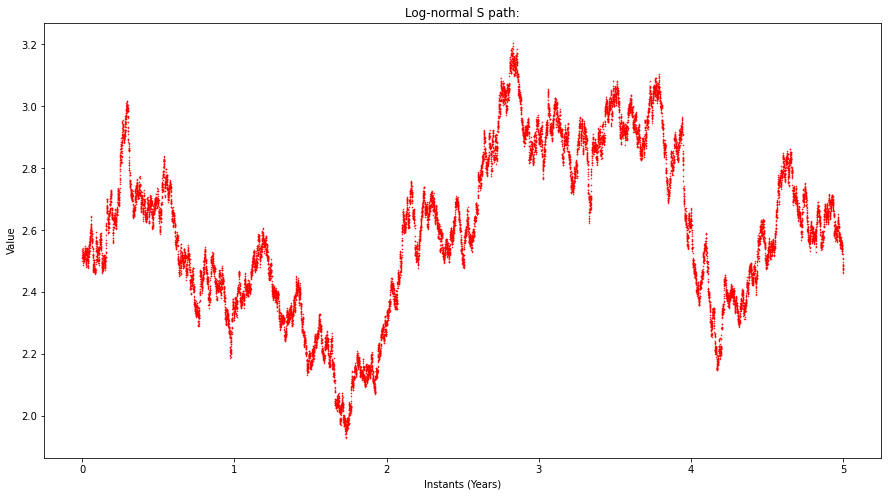

In [7]:
S = Geometric_Brownian_Motion(S_0, mu, sigma, checking_instants)
plot('Log-normal S path:', S, dt, 'red', 'Log-normal S path')

### Determining the correspondent path of $F$, with respect to the simulated path of $S$, over the chosen period

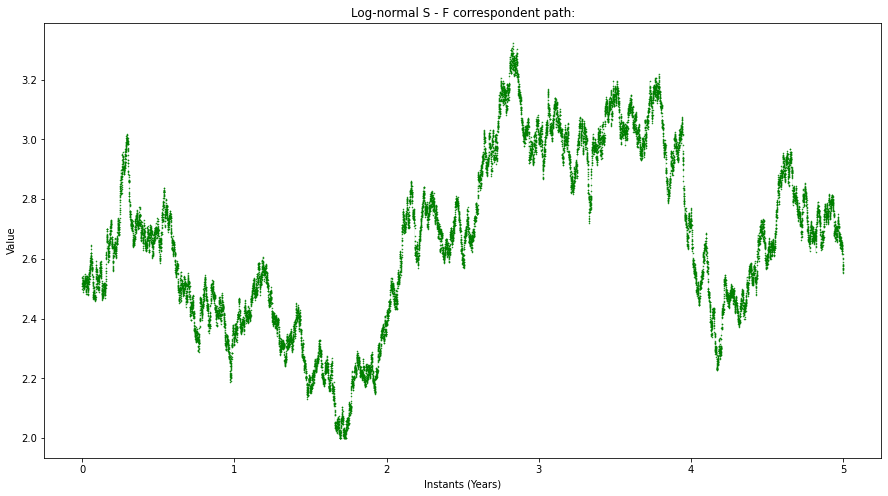

In [8]:
K_floor = Gen_K(K, checking_instants)
F = Gen_F(S,K)

plot('Log-normal S - F correspondent path:', F, dt, 'green', 'Log-normal S - F correspondent path')

### Comparison between $S$ and the portfolio $F$ with the Dynamic Fund Protection

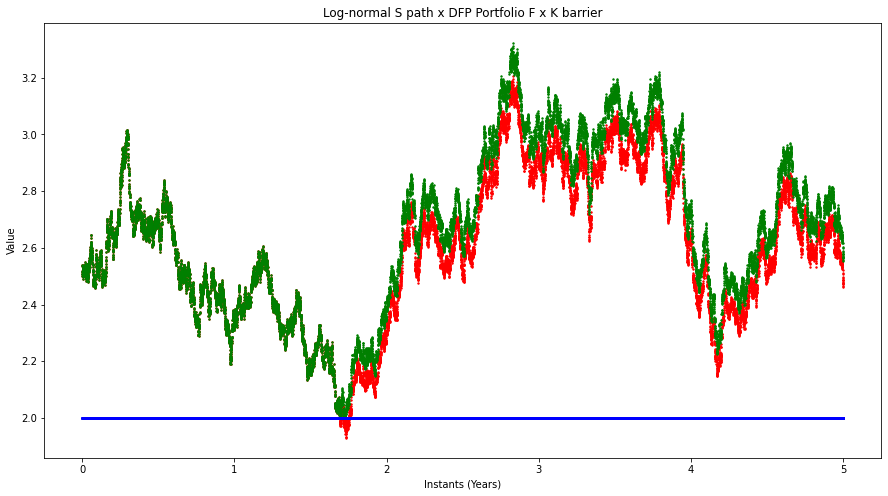

In [9]:
plot_superimpose('Log-normal S path x DFP Portfolio F x K barrier', 'Log-normal S path x DFP Portfolio F x K barrier', S , F, K_floor, dt)